# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## Clase 6: Modelos de clasificación 

### Árboles y Random Forest

Los árboles de decisión son formas extremadamente intuitivas para clasificar o etiquetar objetos: simplemente hace una serie de preguntas diseñadas para concentrarse en la regresión o clasificación.
Por ejemplo, si desea construir un árbol de decisión para clasificar una casa, puede construir el que se muestra aquí:

<center>
<img src="https://raw.githubusercontent.com/RodrigoLaraMolina/DPATTSrc/master/decision-tree-house.png" alt="decision_tree" style="width: 700px;" align="center" frameborder="200"/>
</center>

<center>
<img src="img/regression_trees.png" width="800" class="center">
</center>

En esta clase vamos a ver los modelos de clasificación relacionados con árboles de clasificación. 

Cubriremos los siguientes temas:
- Selección de hiper-parámetros.
- Interpretación de los árboles.
- Importancia de variables.
- Tipos de ensambles: simulatáneos y secuenciales.
- Regularización de árboles.
- Evaluación de los modelos.

Estudiaremos los siguientes tres modelos:
- Árboles de clasificación
- Random Forest (Bosques aleatorios)
- Gradient Boosting Machine

#### Contraceptive Method Choice Data Set
Esta base es una muestra de una encuesta sobre anticonceptivos en 1987 en Indonesia. Las muestras son mujeres casadas que podían estar o no embarazadas y no lo sabían al momento de la entrevista. __El problema de predicción será predecir si el método anticonceptivo actual es:__

0. No se usa
1. Largo plazo
2. Corto plazo

Para ver una descripción más detallada vea: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

In [61]:
# 1. Wife's age (numerical)
# 2. Wife's education (categorical) 1=low, 2, 3, 4=high
# 3. Husband's education (categorical) 1=low, 2, 3, 4=high
# 4. Number of children ever born (numerical)
# 5. Wife's religion (binary) 0=Non-Islam, 1=Islam
# 6. Wife's now working? (binary) 0=Yes, 1=No
# 7. Husband's occupation (categorical) 1, 2, 3, 4
# 8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
# 9. Media exposure (binary) 0=Good, 1=Not good
# 10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

In [18]:
import pandas as pd

# Cargamos los datos
data = pd.read_csv('../Data/cmc.csv')

In [19]:
# Veo las primeras diez filas
data.head(10) 

,AgeWife,EducWife,EducHusband,children,IslamWife,WorkingWife,OccupationHusband,StandardLivingIndex,MediaExposure,Contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


In [20]:
# Estudio el tamaño de la base de datos ¿Cuántas variables hay? ¿Cuántas observaciones?
data.shape 

(1473, 10)

In [21]:
data.OccupationHusband.unique()

array([2, 3, 1, 4], dtype=int64)

In [22]:
# Veo las medias, que notan sobre el tipo de variables? Tiene sentido estudiar la media de TODAS las variables?
data.mean()

AgeWife                32.538357
EducWife                2.958588
EducHusband             3.429735
children                3.261371
IslamWife               0.850645
WorkingWife             0.749491
OccupationHusband       2.137814
StandardLivingIndex     3.133741
MediaExposure           0.073999
Contraceptive           1.919891
dtype: float64

In [23]:
# Dummyficamos
data = pd.get_dummies(data, columns = ['OccupationHusband', 'EducWife', 'EducHusband'])

In [24]:
# Estudiemos el desbalance de las clases
data.Contraceptive.value_counts(normalize = True)

1    0.427020
3    0.346911
2    0.226069
Name: Contraceptive, dtype: float64

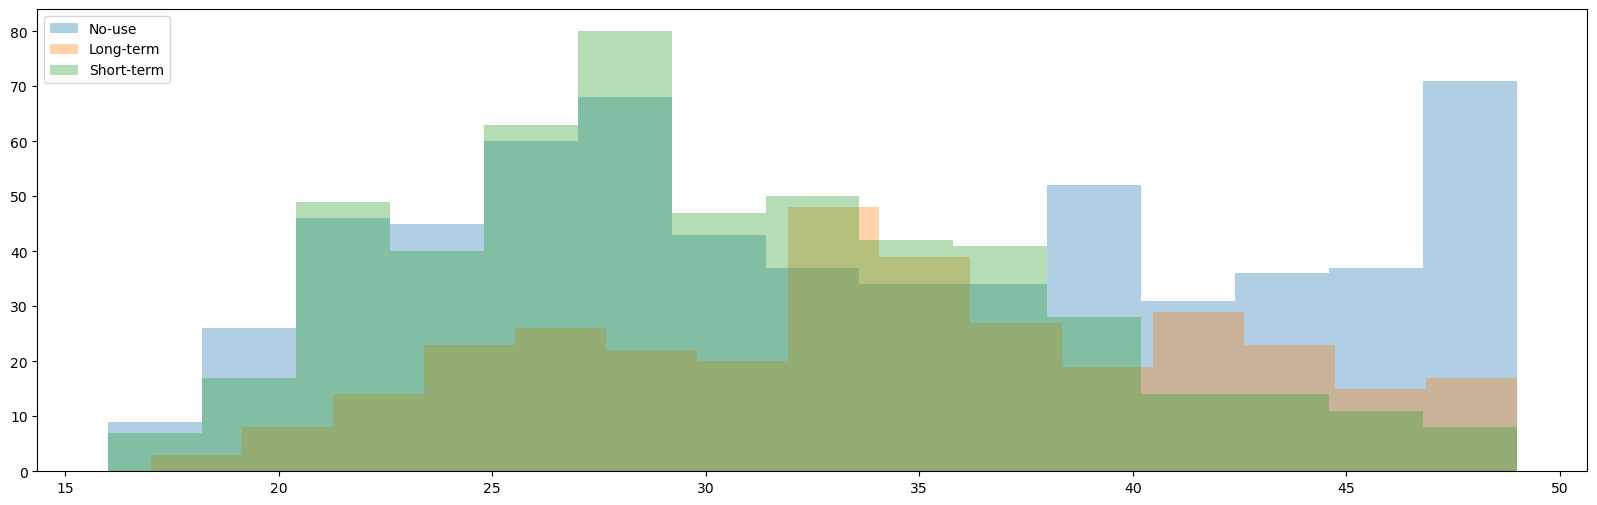

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,6)) 
# Histograma de edad de la esposa para los Contraceptive == 1
plt.hist(data.AgeWife.loc[data.Contraceptive == 1], alpha = 0.35, label = 'No-use', bins = 15) 
# Histograma de edad de la esposa para los Contraceptive==2
plt.hist(data.AgeWife.loc[data.Contraceptive == 2], alpha = 0.35, label = 'Long-term', bins = 15) 
# Histograma de edad de la esposa para los Contraceptive==3
plt.hist(data.AgeWife.loc[data.Contraceptive == 3], alpha = 0.35, label = 'Short-term', bins = 15) 
# Que aparezca la leyenda
plt.legend(); 

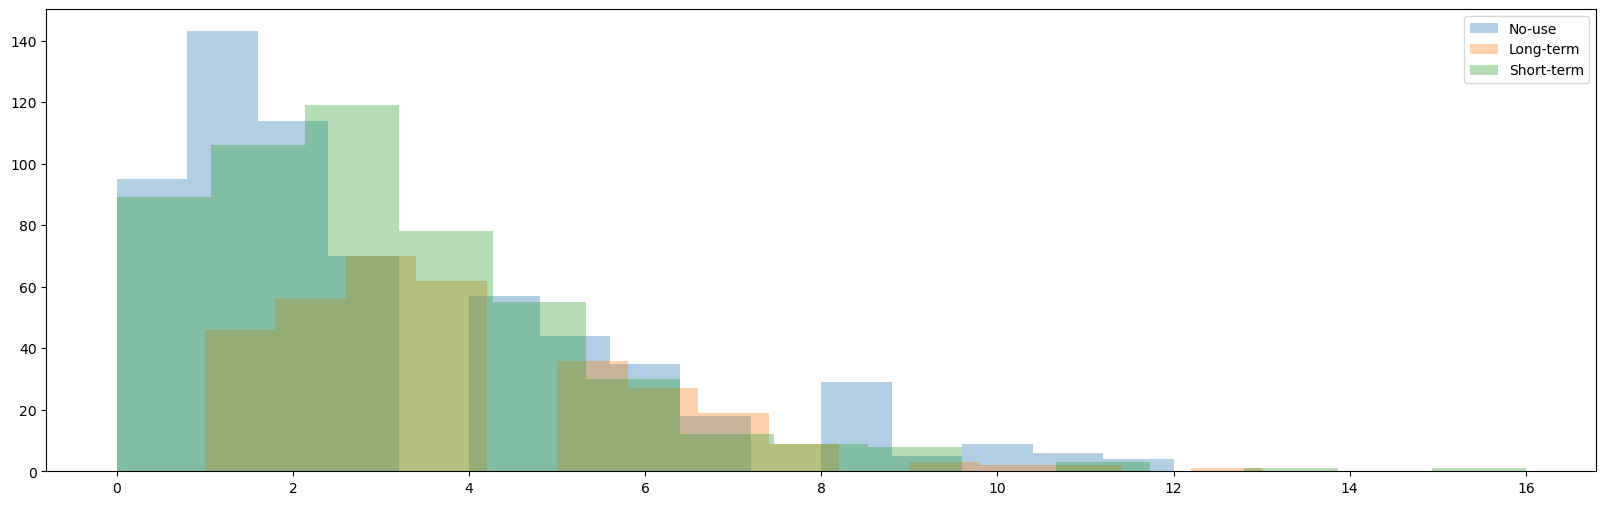

In [29]:
plt.figure(figsize = (20,6)) 
# Histograma de número de hijos para los Contraceptive==1
plt.hist(data.children.loc[data.Contraceptive == 1], alpha = 0.35, label = 'No-use', bins = 15) 
# Histograma de número de hijos para los Contraceptive==2
plt.hist(data.children.loc[data.Contraceptive == 2], alpha = 0.35, label = 'Long-term', bins = 15) 
# Histograma de número de hijos para los Contraceptive==3
plt.hist(data.children.loc[data.Contraceptive == 3], alpha = 0.35, label = 'Short-term', bins = 15) 
plt.legend(); # Que aparezca la leyenda

In [31]:
from sklearn.model_selection import train_test_split

# Necesitamos separar la muestra en entrenamiento y testeo
X = data.drop(columns = 'Contraceptive')
y = data['Contraceptive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)

In [32]:
print('El tamaño de la muestra de entrenamiento es ', X_train.shape)
print('El tamaño de la muestra de prueba es ', X_test.shape)
print('El tamaño del vector de marca de entrenamiento es ', y_train.shape)
print('El tamaño del vector de marca de prueba es ', y_test.shape)

El tamaño de la muestra de entrenamiento es  (1178, 18)
El tamaño de la muestra de prueba es  (295, 18)
El tamaño del vector de marca de entrenamiento es  (1178,)
El tamaño del vector de marca de prueba es  (295,)


#### Entrenamiento del Árbol

<center>
<img src="img/tree.png" width = 600>
</center>

**Hiperparámetros del Árbol**
- Profundidad.
- Mínimo de observaciones para separar.
- Mínimo de observaciones en las hojas.

In [34]:
# importe de scikit-learn el módulo tree, el cual contiene árboles de clasificación
from sklearn import tree 

In [55]:
# Construyo el objeto que es el árbol de clasificación
arbol = tree.DecisionTreeClassifier(max_depth = 12, random_state = 23) 
# Estimo el modelo
arbol.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=12, random_state=23)

In [56]:
# Predicción dentro y fuera de muestra
y_hat_in_tree = arbol.predict(X_train)
y_hat_out_tree = arbol.predict(X_test)

# Predecimos las probabilidades
y_prob_in_tree = arbol.predict_proba(X_train)
y_prob_out_tree = arbol.predict_proba(X_test)

In [57]:
# Evaluemos nuestro modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Que tanto aprendió dentro de la muestra?
print(np.round(100*roc_auc_score(y_train==1 , y_prob_in_tree[:,0]), 1))
print(np.round(100*roc_auc_score(y_train==2 , y_prob_in_tree[:,1]), 1))
print(np.round(100*roc_auc_score(y_train==3 , y_prob_in_tree[:,2]), 1))

# Matriz de confusión
pd.crosstab(y_train, y_hat_in_tree, margins = True)

96.8
96.8
95.3


col_0,1,2,3,All
Contraceptive,,,,
1,444,16,40,500
2,29,220,27,276
3,46,38,318,402
All,519,274,385,1178


In [58]:
# ¿Qué tanto aprendió el modelo de manera generalizada?
print(np.round(100*roc_auc_score(y_test==1 , y_prob_out_tree[:,0]), 1))
print(np.round(100*roc_auc_score(y_test==2 , y_prob_out_tree[:,1]), 1))
print(np.round(100*roc_auc_score(y_test==3 , y_prob_out_tree[:,2]), 1))

# Matriz de confusión
pd.crosstab(y_test, y_hat_out_tree, margins = True)

72.0
64.3
64.7


col_0,1,2,3,All
Contraceptive,,,,
1,80,19,30,129
2,21,25,11,57
3,22,34,53,109
All,123,78,94,295


__¡¡¡HAY OVERFITTING!!!__ La diferencia tan grande entre el AUC de la curva ROC entre el entrenamiento y la prueba nos lo indica. Para corregir esto volvemos y cambiamos los hiperparámetros que nos permiten _podar (regularizar)_ los árboles. 

In [61]:
from sklearn.model_selection import GridSearchCV

arbol = tree.DecisionTreeClassifier(random_state = 23) 
grilla_arbol = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17]}
arbol_cv = GridSearchCV(arbol, grilla_arbol, scoring = "roc_auc_ovo", return_train_score = True, cv = 10)
arbol_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17]},
             return_train_score=True, scoring='roc_auc_ovo')

In [62]:
cv_tree_results = pd.DataFrame(arbol_cv.cv_results_)

In [64]:
cv_tree_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [68]:
arbol_cv.best_params_

{'max_depth': 5}

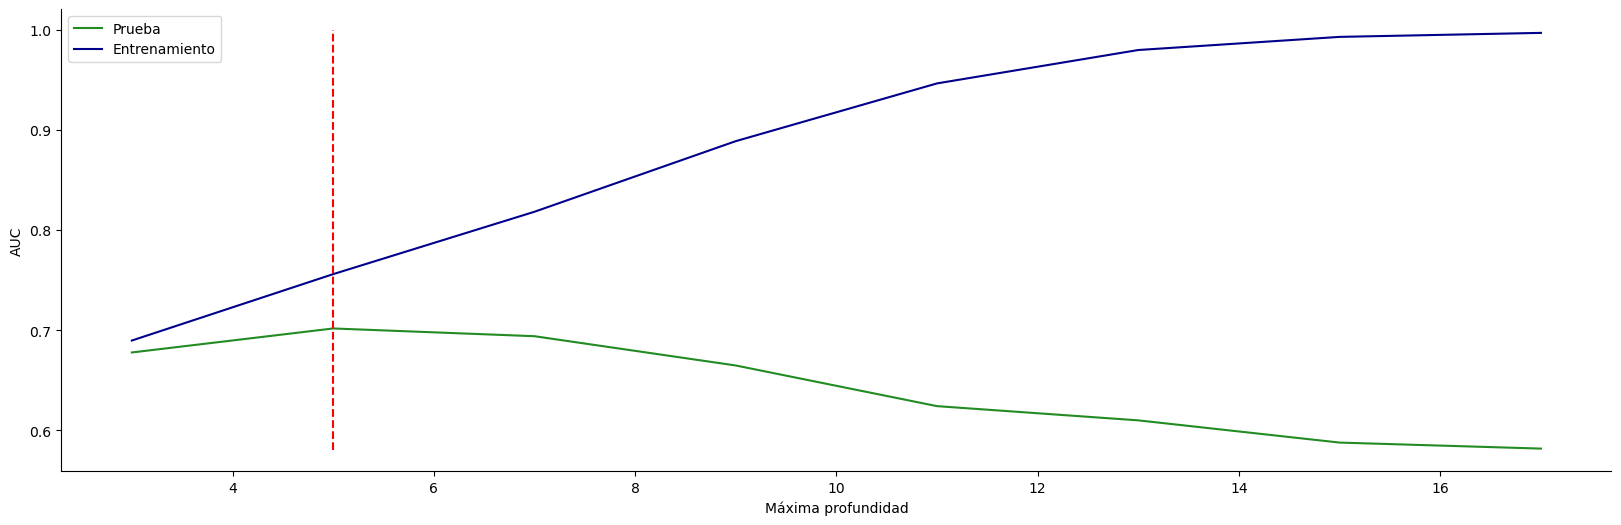

In [74]:
import seaborn as sns

# Visualicemos
fig, ax = plt.subplots(figsize = (20, 6))
sns.despine()
sns.lineplot(data = cv_tree_results, x = 'param_max_depth', y = 'mean_test_score', ax = ax, color = "forestgreen",
             label = "Prueba")
sns.lineplot(data = cv_tree_results, x = 'param_max_depth', y = 'mean_train_score', ax = ax, color = "darkblue",
             label = "Entrenamiento")
plt.legend()
ax.set_xlabel("Máxima profundidad")
ax.set_ylabel("AUC")
plt.vlines(x = arbol_cv.best_params_["max_depth"], ymin = 0.58, ymax = 1, color = "red", 
           linestyles = "dashed")

In [80]:
# pip install graphviz

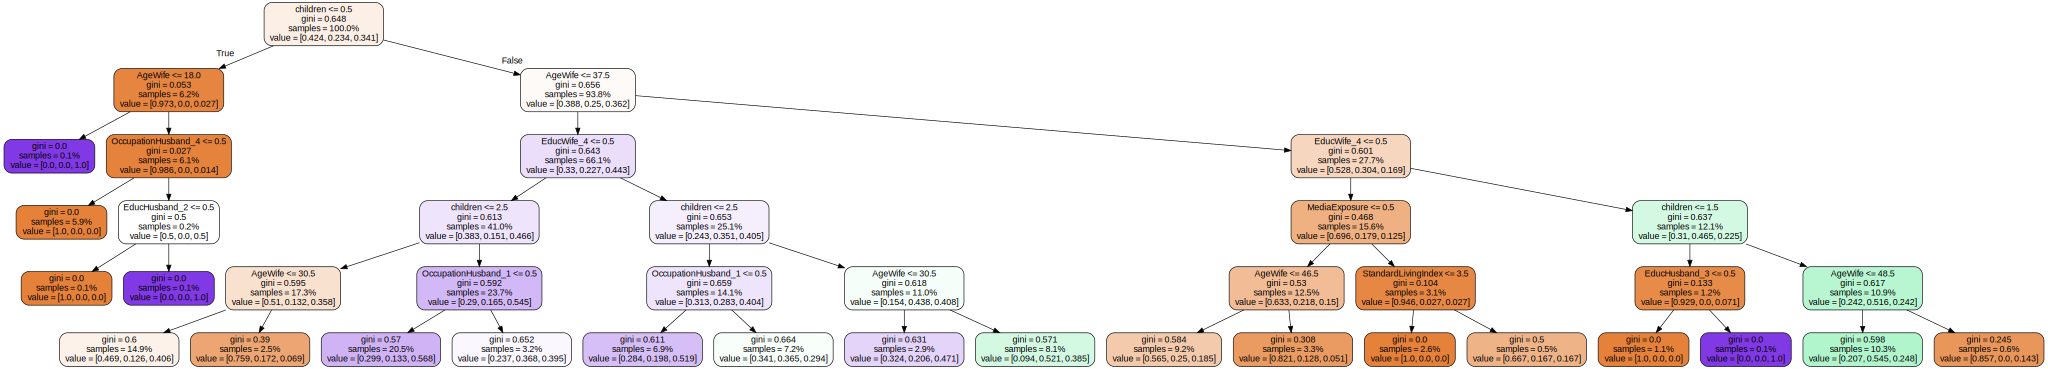

In [88]:
# Graficamos el árbol
import graphviz

dot_data = tree.export_graphviz(arbol_cv.best_estimator_, out_file = None, 
                                feature_names = X_train.columns,
                                rounded = True, proportion = True, 
                                filled = True)

graph = graphviz.Source(dot_data, format = "png") 
graph

In [91]:
graph.render(filename = 'arbol')

'arbol.png'

¿Cuáles son las variables más importantes?

In [96]:
# Creamos un dataframe con las importancias
importancia_arbol = pd.DataFrame(arbol_cv.best_estimator_.feature_importances_, 
                                 index = X_train.columns, 
                                 columns = ['Importancia']).sort_values("Importancia", ascending = True)
importancia_arbol

,Importancia
OccupationHusband_3,0.000000
EducHusband_1,0.000000
EducWife_3,0.000000
EducWife_2,0.000000
EducWife_1,0.000000
OccupationHusband_2,0.000000
EducHusband_4,0.000000
WorkingWife,0.000000
IslamWife,0.000000
StandardLivingIndex,0.005550


<AxesSubplot:>

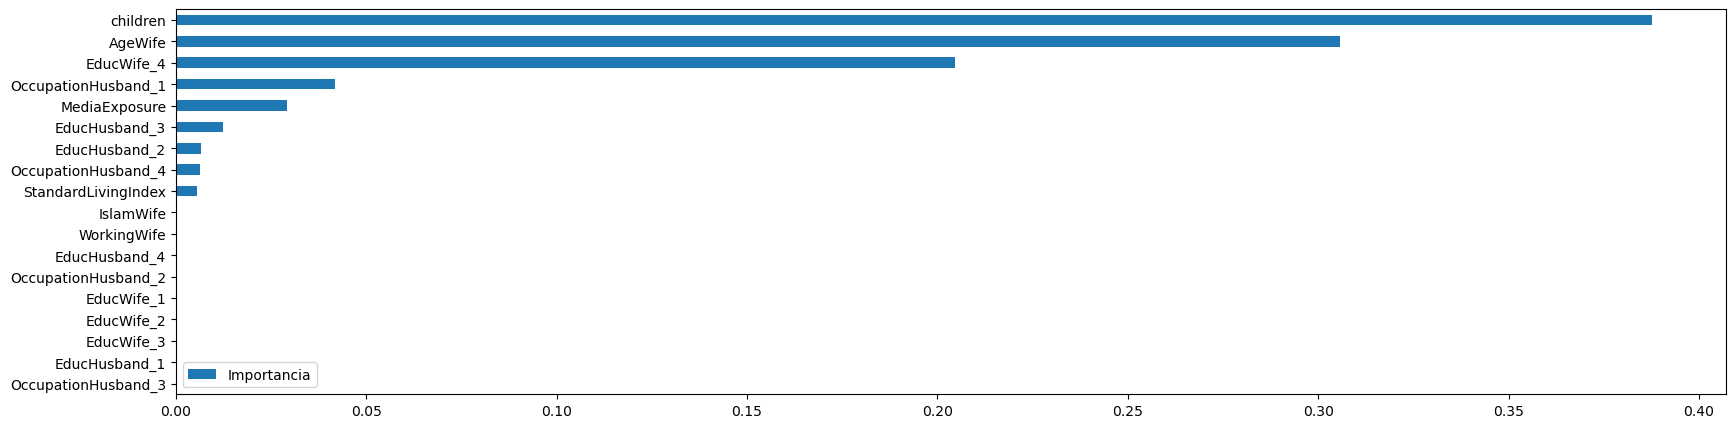

In [98]:
# Visualización de la importancia
importancia_arbol.plot(kind = 'barh', figsize=(20, 5))

#### Entrenamiento del Random Forest

**Hiperparámetros**
- Número de árboles
- Máximo número de variables

In [99]:
# Importo la función para estimar RandomForest
from sklearn.ensemble import RandomForestClassifier 

In [100]:
# Defino el RandomForest
rf = RandomForestClassifier(max_depth = 6, n_estimators = 100, random_state = 23)
# Estimo el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=23)

In [101]:
# Predicción dentro y fuera de muestra
y_hat_in_rf = rf.predict(X_train)
y_hat_out_rf = rf.predict(X_test)

# Predecimos las probabilidades
y_prob_in_rf = rf.predict_proba(X_train)
y_prob_out_rf = rf.predict_proba(X_test)

In [103]:
# Que tanto aprendió dentro de la muestra?
print(np.round(100*roc_auc_score(y_train==1 , y_prob_in_rf[:,0]), 1))
print(np.round(100*roc_auc_score(y_train==2 , y_prob_in_rf[:,1]), 1))
print(np.round(100*roc_auc_score(y_train==3 , y_prob_in_rf[:,2]), 1))

# Matriz de confusión
pd.crosstab(y_train, y_hat_in_rf, margins = True)

84.9
83.6
81.2


col_0,1,2,3,All
Contraceptive,,,,
1,356,45,99,500
2,59,143,74,276
3,71,68,263,402
All,486,256,436,1178


In [104]:
# ¿Qué tanto aprendió el modelo de manera generalizada?
print(np.round(100*roc_auc_score(y_test==1 , y_prob_out_rf[:,0]), 1))
print(np.round(100*roc_auc_score(y_test==2 , y_prob_out_rf[:,1]), 1))
print(np.round(100*roc_auc_score(y_test==3 , y_prob_out_rf[:,2]), 1))

# Matriz de confusión
pd.crosstab(y_test, y_hat_out_rf, margins = True)

79.0
71.9
68.2


col_0,1,2,3,All
Contraceptive,,,,
1,89,10,30,129
2,15,22,20,57
3,32,24,53,109
All,136,56,103,295


In [105]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 23)
grilla_rf = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17]}
rf_cv = GridSearchCV(rf, grilla_rf, scoring = "roc_auc_ovo", return_train_score = True, cv = 10)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17]},
             return_train_score=True, scoring='roc_auc_ovo')

In [106]:
cv_rf_results = pd.DataFrame(rf_cv.cv_results_)

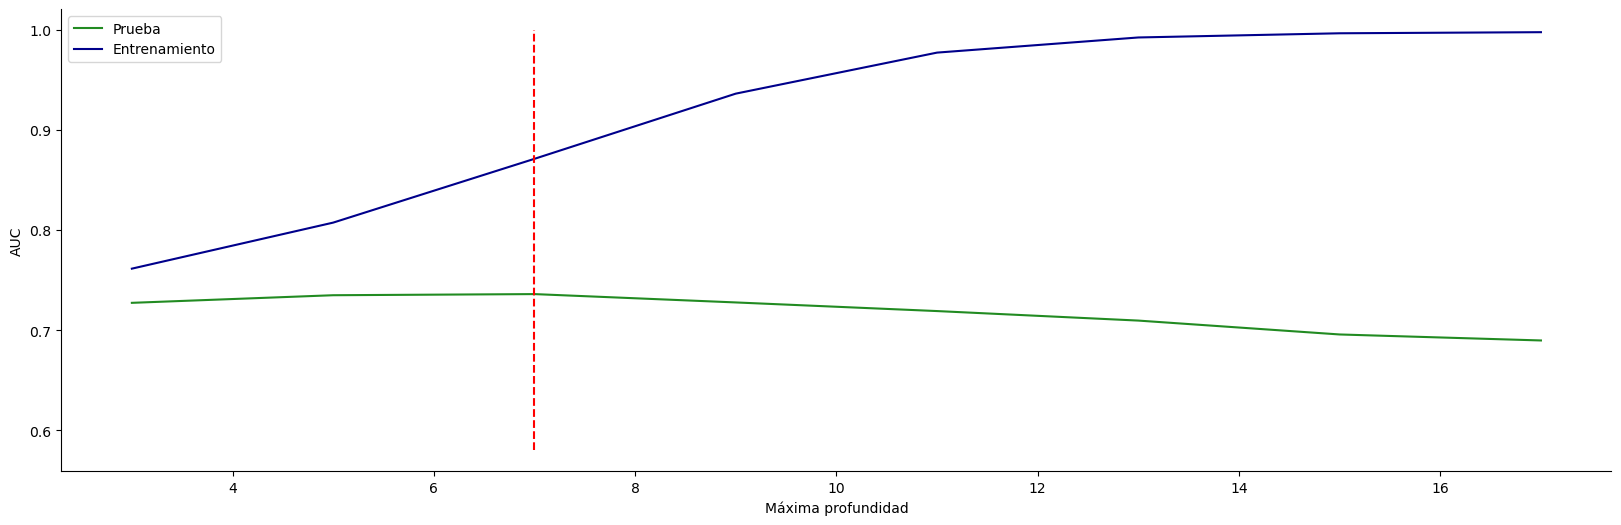

In [107]:
# Visualicemos
fig, ax = plt.subplots(figsize = (20, 6))
sns.despine()
sns.lineplot(data = cv_rf_results, x = 'param_max_depth', y = 'mean_test_score', ax = ax, color = "forestgreen",
             label = "Prueba")
sns.lineplot(data = cv_rf_results, x = 'param_max_depth', y = 'mean_train_score', ax = ax, color = "darkblue",
             label = "Entrenamiento")
plt.legend()
ax.set_xlabel("Máxima profundidad")
ax.set_ylabel("AUC")
plt.vlines(x = rf_cv.best_params_["max_depth"], ymin = 0.58, ymax = 1, color = "red", 
           linestyles = "dashed")

In [110]:
# Estudiamos la importancia de las variables en el RandomForest
importancia_rf = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, 
                            index = X_train.columns, 
                            columns = ['Importancia']).sort_values("Importancia", ascending = True)
importancia_rf

,Importancia
OccupationHusband_4,0.008540
EducHusband_1,0.014720
OccupationHusband_2,0.016541
EducWife_3,0.019510
EducHusband_2,0.020025
IslamWife,0.020178
OccupationHusband_3,0.021818
EducWife_2,0.022629
EducHusband_3,0.024677
EducHusband_4,0.025513


<AxesSubplot:>

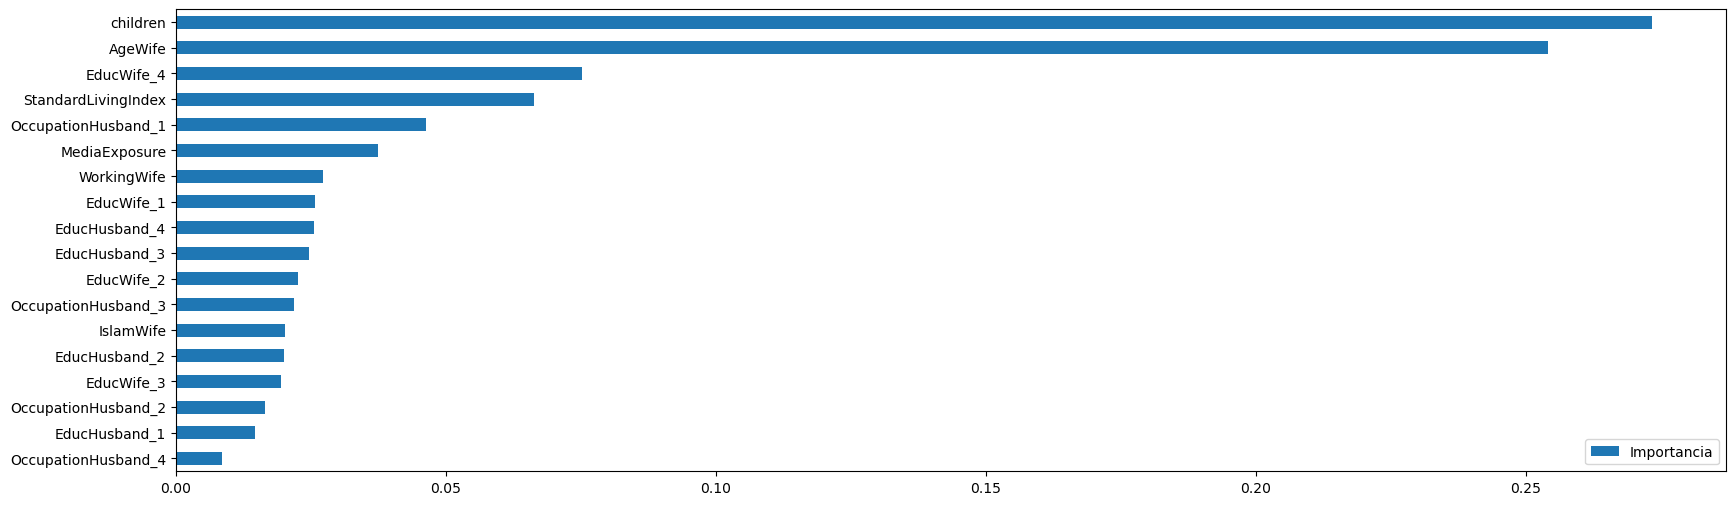

In [111]:
# Visualización de la importancia
importancia_rf.plot(kind = 'barh', figsize = (20,6))

In [115]:
auc_promedio_in_tree = roc_auc_score(y_train, y_prob_in_tree, multi_class = "ovr")
auc_promedio_out_tree = roc_auc_score(y_test, y_prob_out_tree, multi_class = "ovr")
auc_promedio_in_rf = roc_auc_score(y_train, y_prob_in_rf, multi_class = "ovr")
auc_promedio_out_rf = roc_auc_score(y_test, y_prob_out_rf, multi_class = "ovr")

In [117]:
resultados = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Árbol de Decisión", "Random Forest", "Random Forest"],
    "Muestra": ["In sample", "Out of sample", "In sample", "Out of sample"],
    "AUC": [auc_promedio_in_tree, auc_promedio_out_tree, auc_promedio_in_rf, auc_promedio_out_rf]})

Text(0, 0.5, 'AUC promedio')

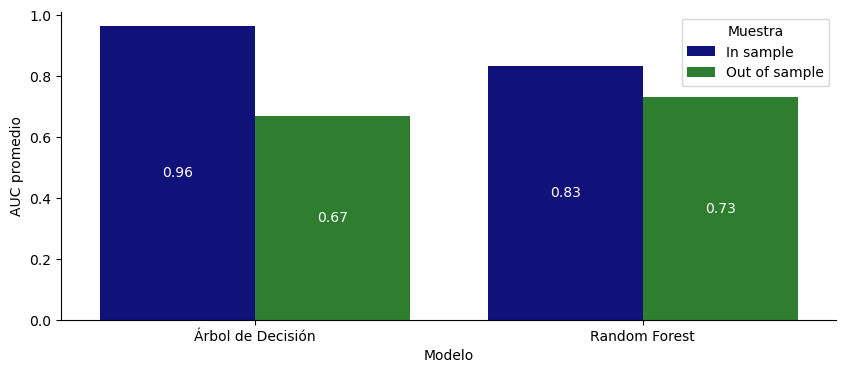

In [119]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "AUC", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("AUC promedio")

### Tarea
Aplique el modelo de Árboles de Decisión y de Random Forest a la base del Taller de Regularización.